In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from tabulate import tabulate

In [2]:
with open('corpus.txt', 'r') as f:
        corpus = f.read()
        f.close()
corpus = ast.literal_eval(corpus)
%run MovieSentimentsDataCleaning.ipynb
data = dataCleaning()
'''np.random.seed(10)
remove_n = 9900
drop_indices = np.random.choice(data.index, remove_n, replace=False)
data = data.drop(drop_indices)
indicesList = sorted(drop_indices, reverse=True)
for indx in indicesList:
    if indx < len(corpus):
       corpus.pop(indx)'''

In [17]:
%run MovieSentimentsFastText.ipynb
%run MovieSentimentsModel.ipynb

NB_accuracies, NB_matrices, DT_accuracies, DT_matrices = runModels(data, corpus)
FT_accuracies, FT_precisions, FT_recalls = fastTextRun(data, corpus)
print(f'Naive Bayes Accuracies: {NB_accuracies}')
print(f'Decision Tree Accuracies: {DT_accuracies}')
print(f'Fast Text Accuracies: {FT_accuracies}')

NB Run 1 Accuracy: 0.7
DT Run 1 Accuracy: 0.7
NB Run 2 Accuracy: 0.6
DT Run 2 Accuracy: 0.7
NB Run 3 Accuracy: 0.5
DT Run 3 Accuracy: 0.4
NB Run 4 Accuracy: 0.5
DT Run 4 Accuracy: 0.5
NB Run 5 Accuracy: 0.5
DT Run 5 Accuracy: 0.4
NB Run 6 Accuracy: 0.5
DT Run 6 Accuracy: 0.8
NB Run 7 Accuracy: 0.5
DT Run 7 Accuracy: 0.2
NB Run 8 Accuracy: 0.7
DT Run 8 Accuracy: 0.8
NB Run 9 Accuracy: 0.6
DT Run 9 Accuracy: 0.2
NB Run 10 Accuracy: 0.8
DT Run 10 Accuracy: 0.3
FastText Run 1 Accuracy: 0.6
FastText Run 2 Accuracy: 0.5
FastText Run 3 Accuracy: 0.4
FastText Run 4 Accuracy: 0.6
FastText Run 5 Accuracy: 0.7
FastText Run 6 Accuracy: 0.6
FastText Run 7 Accuracy: 0.6
FastText Run 8 Accuracy: 0.5
FastText Run 9 Accuracy: 0.6
FastText Run 10 Accuracy: 0.4
Naive Bayes Accuracies: [0.7, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.7, 0.6, 0.8]
Decision Tree Accuracies: [0.7, 0.7, 0.4, 0.5, 0.4, 0.8, 0.2, 0.8, 0.2, 0.3]
Fast Text Accuracies: [0.6, 0.5, 0.4, 0.6, 0.7, 0.6, 0.6, 0.5, 0.6, 0.4]


In [18]:
NB_accuracy = sum(NB_accuracies)/len(NB_accuracies)
DT_accuracy = sum(DT_accuracies)/len(DT_accuracies)
FT_accuracy = sum(FT_accuracies)/len(FT_accuracies)
print(f'Naive Bayes Average Accuracy: {NB_accuracy}')
print(f'Decision Tree Average Accuracy: {DT_accuracy}')
print(f'Fast Text Average Accuracy: {FT_accuracy}')

Naive Bayes Average Accuracy: 0.59
Decision Tree Average Accuracy: 0.5
Fast Text Average Accuracy: 0.55


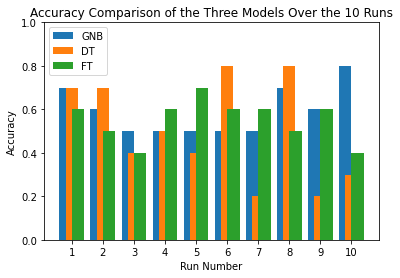

In [19]:
runs = ['1','2','3','4','5','6','7','8','9','10']
X_axis = np.arange(len(runs))

ax = plt.gca()
ax.set_ylim([0,1])
plt.bar(X_axis - 0.2, NB_accuracies, 0.4, label='GNB')
plt.bar(X_axis, DT_accuracies, 0.4, label='DT')
plt.bar(X_axis + 0.2, FT_accuracies, 0.4, label='FT')

plt.xticks(X_axis, runs)
plt.xlabel("Run Number")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of the Three Models Over the 10 Runs")
plt.legend()
plt.show()

In [20]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

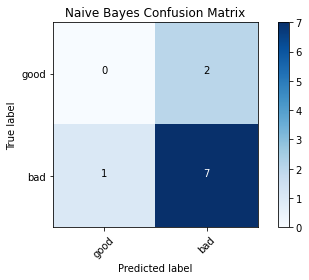

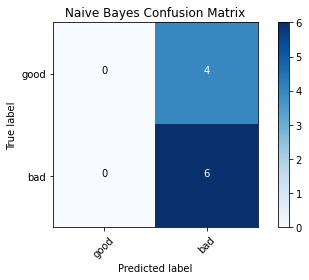

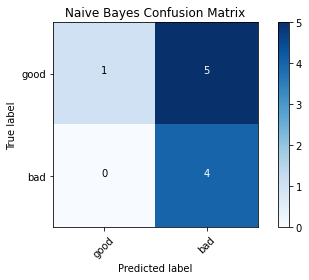

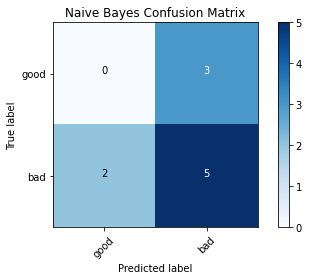

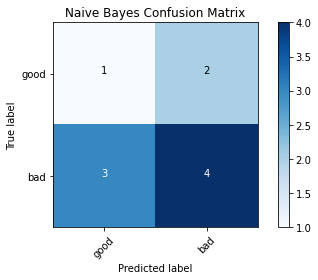

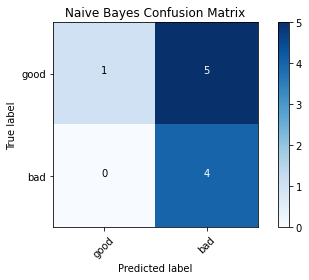

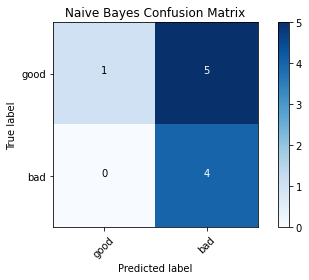

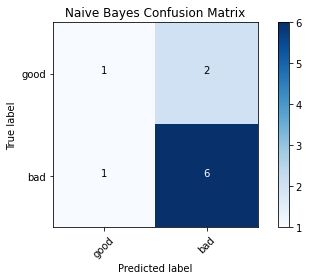

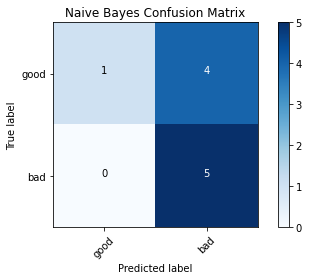

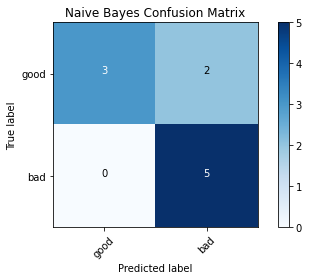

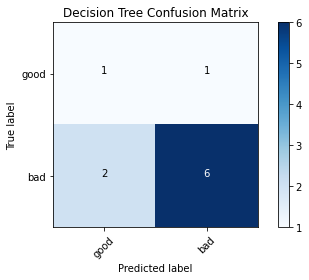

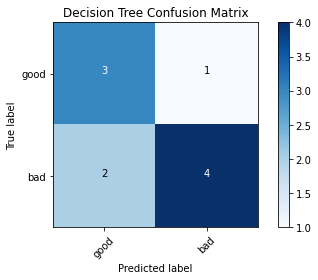

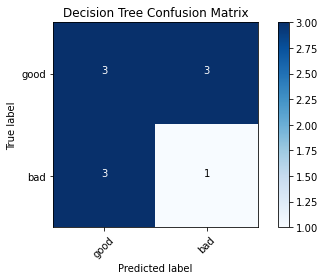

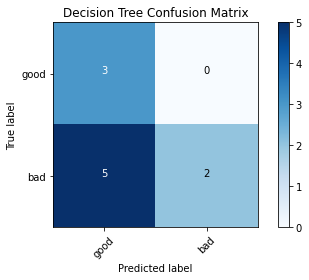

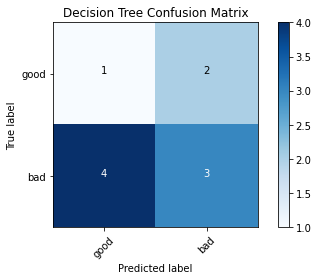

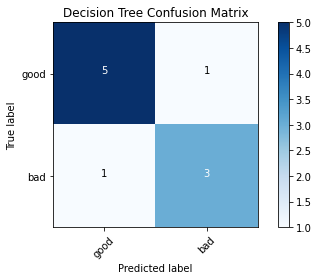

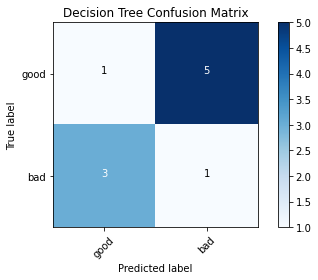

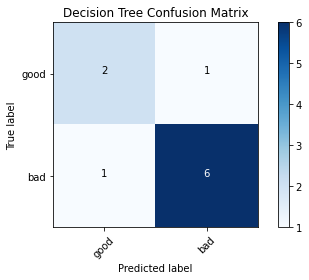

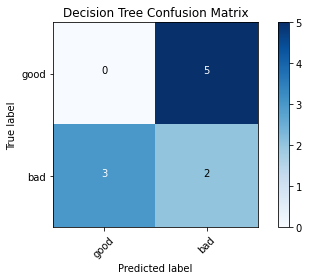

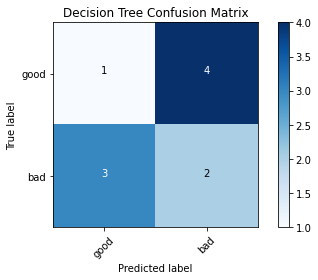

In [29]:
class_names = ['good', 'bad']
NB_precisions = []
NB_recalls = []
for cnf_matrix in NB_matrices:
    plt.figure()
    tn, fp, fn, tp = cnf_matrix.ravel() 
    NB_precisions.append(tp / (tp + fp))
    NB_recalls.append(tp / (tp + fn))
    plot_confusion_matrix(cnf_matrix, classes=class_names, title="Naive Bayes Confusion Matrix")
    plt.show()

DT_precisions = []
DT_recalls = []
for cnf_matrix in DT_matrices:
    plt.figure()
    tn, fp, fn, tp = cnf_matrix.ravel() 
    DT_precisions.append(tp / (tp + fp))
    DT_recalls.append(tp / (tp + fn))
    plot_confusion_matrix(cnf_matrix, classes=class_names, title="Decision Tree Confusion Matrix")
    plt.show()

In [30]:
NB_precision = sum(NB_precisions)/len(NB_precisions)
DT_precision = sum(DT_precisions)/len(DT_precisions)
FT_precision = sum(FT_precisions)/len(FT_precisions)
print(f'Naive Bayes Average Precision: {NB_precision}')
print(f'Decision Tree Average Precision: {DT_precision}')
print(f'Fast Text Average Precision: {FT_precision}')

NB_recall = sum(NB_recalls)/len(NB_recalls)
DT_recall = sum(DT_recalls)/len(DT_recalls)
FT_recall = sum(FT_recalls)/len(FT_recalls)
print(f'Naive Bayes Average Recall: {NB_recall}')
print(f'Decision Tree Average Recall: {DT_recall}')
print(f'Fast Text Average Recall: {FT_recall}')

Naive Bayes Average Precision: 0.6022619047619047
Decision Tree Average Precision: 0.59
Fast Text Average Precision: 0.6047619047619048
Naive Bayes Average Recall: 0.9017857142857142
Decision Tree Average Recall: 0.5038095238095238
Fast Text Average Recall: nan


In [31]:
table = [['Model', 'Accuracy', 'Precision', 'Recall'], ['Naive Bayes', NB_accuracy, NB_precision, NB_recall], ['Decision Tree', DT_accuracy, DT_precision, DT_recall], ['Fast Text', FT_accuracy, FT_precision, FT_recall]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════╤════════════╤═════════════╤════════════╕
│ Model         │   Accuracy │   Precision │     Recall │
╞═══════════════╪════════════╪═════════════╪════════════╡
│ Naive Bayes   │       0.59 │    0.602262 │   0.901786 │
├───────────────┼────────────┼─────────────┼────────────┤
│ Decision Tree │       0.5  │    0.59     │   0.50381  │
├───────────────┼────────────┼─────────────┼────────────┤
│ Fast Text     │       0.55 │    0.604762 │ nan        │
╘═══════════════╧════════════╧═════════════╧════════════╛
